In [5]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns

In [6]:
taxons = pd.read_csv('../../data/clean_taxons.csv')

NOTE: Consider way to move the top level taxon taxon_name to level1taxon if level1taxon is Nan. At the moment can't do this as would like becuase pensions is toplevel, yet also has parent = work. Think this might change in taxons data update so not going to spend time on it now.

In [7]:
content = pd.read_csv('../../data/clean_content.csv')

In [8]:
taxons = taxons[['base_path','content_id','taxon_name','level1taxon','level2taxon','level3taxon','level4taxon']]

### Hacky fix to remove the taxons that we don't want represented in training/test data

Take out all 'Imported' top taxons and World and Corporate

In [9]:
taxons.shape

(5517, 7)

In [10]:
# Can't you drop the names here before you convert to string, to avoid hackiness later on? MU

taxons['level1taxon'] = taxons['level1taxon'].astype('str')

# Drop taxons that start with Imported (i.e. legacy taxons at the top level)

taxons = taxons[~taxons['level1taxon'].str.startswith("Imported")]
taxons = taxons[~taxons['taxon_name'].str.startswith("Imported")]

print("Taxons shape after deleting imported top taxons: {}".format(taxons.shape))

Taxons shape after deleting imported top taxons: (4544, 7)


In [11]:
taxons = taxons[taxons.level1taxon != 'World']
taxons = taxons[taxons.taxon_name != 'World']

print("Taxons shape after deleting 'World' top taxons: {}".format(taxons.shape))

Taxons shape after deleting 'World' top taxons: (2042, 7)


In [12]:
taxons = taxons[taxons.level1taxon != 'Corporate information']
taxons = taxons[taxons.taxon_name != 'Corporate information']
print("Taxons shape after deleting 'corporate information' top taxons: {}".format(taxons.shape))

Taxons shape after deleting 'corporate information' top taxons: (2041, 7)


In [13]:
taxons

,base_path,content_id,taxon_name,level1taxon,level2taxon,level3taxon,level4taxon
0,/business/taxon,495afdb6-47be-4df1-8b38-91c8adb1eefc,Business,nan,NaN,NaN,NaN
2,/crime-justice-and-law,ba951b09-5146-43be-87af-44075eac3ae9,"Crime, justice and law",nan,NaN,NaN,NaN
3,/defence,e491505c-77ae-45b2-84be-8c94b94f6a2b,Defence,nan,NaN,NaN,NaN
4,/childcare-parenting/entering-staying-uk,ba3a9702-da22-487f-86c1-8334a730e559,Entering and staying in the UK,nan,NaN,NaN,NaN
5,/environment,3cf97f69-84de-41ae-bc7b-7e2cc238fa58,Environment,nan,NaN,NaN,NaN
6,/going-and-being-abroad,9597c30a-605a-4e36-8bc1-47e5cdae41b3,Going and being abroad,nan,NaN,NaN,NaN
7,/government/taxon,e48ab80a-de80-4e83-bf59-26316856a5f9,Government,nan,NaN,NaN,NaN
8,/health-and-social-care,8124ead8-8ebc-4faf-88ad-dd5cbcc92ba8,Health and social care,nan,NaN,NaN,NaN
9,/housing-local-and-community,4794066e-e3cc-425e-8cc4-e7ff3edb4c39,"Housing, local and community",nan,NaN,NaN,NaN
14,/international,37d0fa26-abed-4c74-8835-b3b51ae1c8b2,International,nan,NaN,NaN,NaN


In [14]:
content_taxons = pd.merge(
    left=content, 
    right=taxons, 
    left_on='taxon_id', 
    right_on='content_id', 
    how='outer', 
    indicator=True
)

In [15]:
content_taxons.shape

(338917, 23)

In [16]:
content_taxons.head()

,Unnamed: 0,base_path_x,content_id_x,description,details,document_type,first_published_at,locale,primary_publishing_organisation,publishing_app,...,variable,taxon_id,base_path_y,content_id_y,taxon_name,level1taxon,level2taxon,level3taxon,level4taxon,_merge
0,4.0,/bank-holidays,58f79dbd-e57f-4ab2-ae96-96df5767d1b2,,{},calendar,2016-02-29T09:24:10.000+00:00,en,NaN,calendars,...,0.0,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,/business/time-off,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both
1,10.0,/calculate-your-holiday-entitlement,deedf6f8-389b-4b34-a5b1-faa9ef909a70,holiday calculator to work out statutory holid...,"{'start_button_text': 'Start now', 'introducto...",transaction,2016-02-29T09:24:10.000+00:00,en,NaN,smartanswers,...,0.0,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,/business/time-off,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both
2,78.0,/maternity-paternity-calculator,05d5412d-455b-485e-a570-020c9176a46e,calculate an employee’s maternity pay (smp) pa...,"{'start_button_text': 'Start now', 'introducto...",transaction,2016-02-29T09:24:10.000+00:00,en,NaN,smartanswers,...,0.0,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,/business/time-off,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both
3,95.0,/calculate-statutory-sick-pay,1c676a9e-0424-4ebb-bab8-d8cb8d2fc6f8,statutory sick pay (ssp) calculator - calculat...,"{'start_button_text': 'Start now', 'introducto...",transaction,2016-02-29T09:24:10.000+00:00,en,NaN,smartanswers,...,0.0,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,/business/time-off,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both
4,201278.0,/training-study-work-your-rights,f50efa51-dc62-4111-aa59-731af77806aa,your rights to request time off for training o...,"{'parts': [{'title': ""Who can and can't ask fo...",guide,2016-02-29T09:24:10.000+00:00,en,NaN,publisher,...,0.0,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,/business/time-off,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both


## Tidy up columns

In [17]:
content_taxons.columns

Index(['Unnamed: 0', 'base_path_x', 'content_id_x', 'description', 'details',
       'document_type', 'first_published_at', 'locale',
       'primary_publishing_organisation', 'publishing_app', 'title', 'body',
       'combined_text', 'variable', 'taxon_id', 'base_path_y', 'content_id_y',
       'taxon_name', 'level1taxon', 'level2taxon', 'level3taxon',
       'level4taxon', '_merge'],
      dtype='object')

In [18]:
content_taxons = content_taxons.drop(['Unnamed: 0', 'variable', 'base_path_y', 'content_id_y', 'details' ], axis=1)

In [19]:
content_taxons.rename(columns={'base_path_x': 'base_path', 'content_id_x': 'content_id'}, inplace=True)

## Training data: filter out rows which are duplicates, or mismatches from merge

In [20]:
print("There are {} rows in the data before filtering".
      format(content_taxons.shape[0]))
print("There are {} unique content items in the data before filtering".
      format(content_taxons.content_id.nunique()))
print("There are {} duplicates content items, both with matching content_id"
      "and taxon_id in the data before filtering"
      .format(content_taxons[content_taxons.duplicated(['content_id', 'taxon_id'])].shape[0]))

There are 338917 rows in the data before filtering
There are 125968 unique content items in the data before filtering
There are 36870 duplicates content items, both with matching content_idand taxon_id in the data before filtering


In [21]:
content_taxons_filtered = content_taxons[content_taxons._merge == 'both']

print("There are {} rows in the taxon-level data after filtering out mismatches".
      format(content_taxons_filtered.shape[0]))
print("There are {} unique content items in the taxon-level data after filtering out mismatches".
      format(content_taxons_filtered.content_id.nunique()))

There are 232865 rows in the taxon-level data after filtering out mismatches
There are 114733 unique content items in the taxon-level data after filtering out mismatches


In [22]:
print("There were {} rows dropped because of mismatching"
      .format(content_taxons.shape[0] - content_taxons_filtered.shape[0]))
print("There were {} unique content items dropped because of mismatching"
      .format(content_taxons.content_id.nunique() - content_taxons_filtered.content_id.nunique()))

There were 106052 rows dropped because of mismatching
There were 11235 unique content items dropped because of mismatching


In [23]:
print("There are {} duplicates content items, both with matching"
      "content_id and taxon_id in after removing mismatches"
      .format(content_taxons_filtered[content_taxons_filtered.
                                      duplicated(['content_id', 'taxon_id'])].shape[0]))

There are 25502 duplicates content items, both with matchingcontent_id and taxon_id in after removing mismatches


In [24]:
content_taxons_dedup = content_taxons_filtered.drop_duplicates(subset = ['content_id', 'taxon_id'])

In [25]:
content_taxons_dedup.shape

(207363, 18)

In [26]:
content_taxons_dedup.head()

,base_path,content_id,description,document_type,first_published_at,locale,primary_publishing_organisation,publishing_app,title,body,combined_text,taxon_id,taxon_name,level1taxon,level2taxon,level3taxon,level4taxon,_merge
0,/bank-holidays,58f79dbd-e57f-4ab2-ae96-96df5767d1b2,,calendar,2016-02-29T09:24:10.000+00:00,en,NaN,calendars,uk bank holidays,,uk bank holidays,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both
1,/calculate-your-holiday-entitlement,deedf6f8-389b-4b34-a5b1-faa9ef909a70,holiday calculator to work out statutory holid...,transaction,2016-02-29T09:24:10.000+00:00,en,NaN,smartanswers,calculate holiday entitlement,,calculate holiday entitlement holiday calculat...,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both
2,/maternity-paternity-calculator,05d5412d-455b-485e-a570-020c9176a46e,calculate an employee’s maternity pay (smp) pa...,transaction,2016-02-29T09:24:10.000+00:00,en,NaN,smartanswers,maternity adoption and paternity calculator fo...,,maternity adoption and paternity calculator fo...,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both
3,/calculate-statutory-sick-pay,1c676a9e-0424-4ebb-bab8-d8cb8d2fc6f8,statutory sick pay (ssp) calculator - calculat...,transaction,2016-02-29T09:24:10.000+00:00,en,NaN,smartanswers,calculate your employee's statutory sick pay,,calculate your employee's statutory sick pay s...,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both
4,/training-study-work-your-rights,f50efa51-dc62-4111-aa59-731af77806aa,your rights to request time off for training o...,guide,2016-02-29T09:24:10.000+00:00,en,NaN,publisher,training and study at work: your rights,,training and study at work: your rights your r...,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both


In [27]:
print("There were {} additional rows dropped due to duplicate content_id/taxon_id combination"
      .format(content_taxons_filtered.shape[0] - content_taxons_dedup.shape[0]))
print("There were {} additional content items dropped due to duplicate content_id/taxon_id combination"
      .format(content_taxons_filtered.content_id.nunique() - content_taxons_dedup.content_id.nunique()))

There were 25502 additional rows dropped due to duplicate content_id/taxon_id combination
There were 0 additional content items dropped due to duplicate content_id/taxon_id combination


## Top level taxons

Expecting 20 top taxons

In [28]:
print("There are {} unique taxon names in the level 1 taxon".format(content_taxons_dedup.level1taxon.nunique()))

There are 20 unique taxon names in the level 1 taxon


In [29]:
topfreq = content_taxons_dedup.groupby('level1taxon').size()
topfreq

level1taxon
Business                                         43530
Crime, justice and law                            2811
Defence                                           3969
Education, training and skills                    9128
Entering and staying in the UK                     293
Environment                                      21299
Going and being abroad                            1648
Government                                       21223
Health and social care                           13935
Housing, local and community                      9929
International                                    11440
Life circumstances                                 240
Money                                             5672
Parenting, childcare and children's services      1010
Regional and local government                     7825
Society and culture                              13254
Transport                                         7759
Welfare                                            29

#### Lookout! Notice the nans in there resulting from the hacky removal of toptaxons. ONly sort this out if it remains a problem after data update when the hacky fix should be deleted.

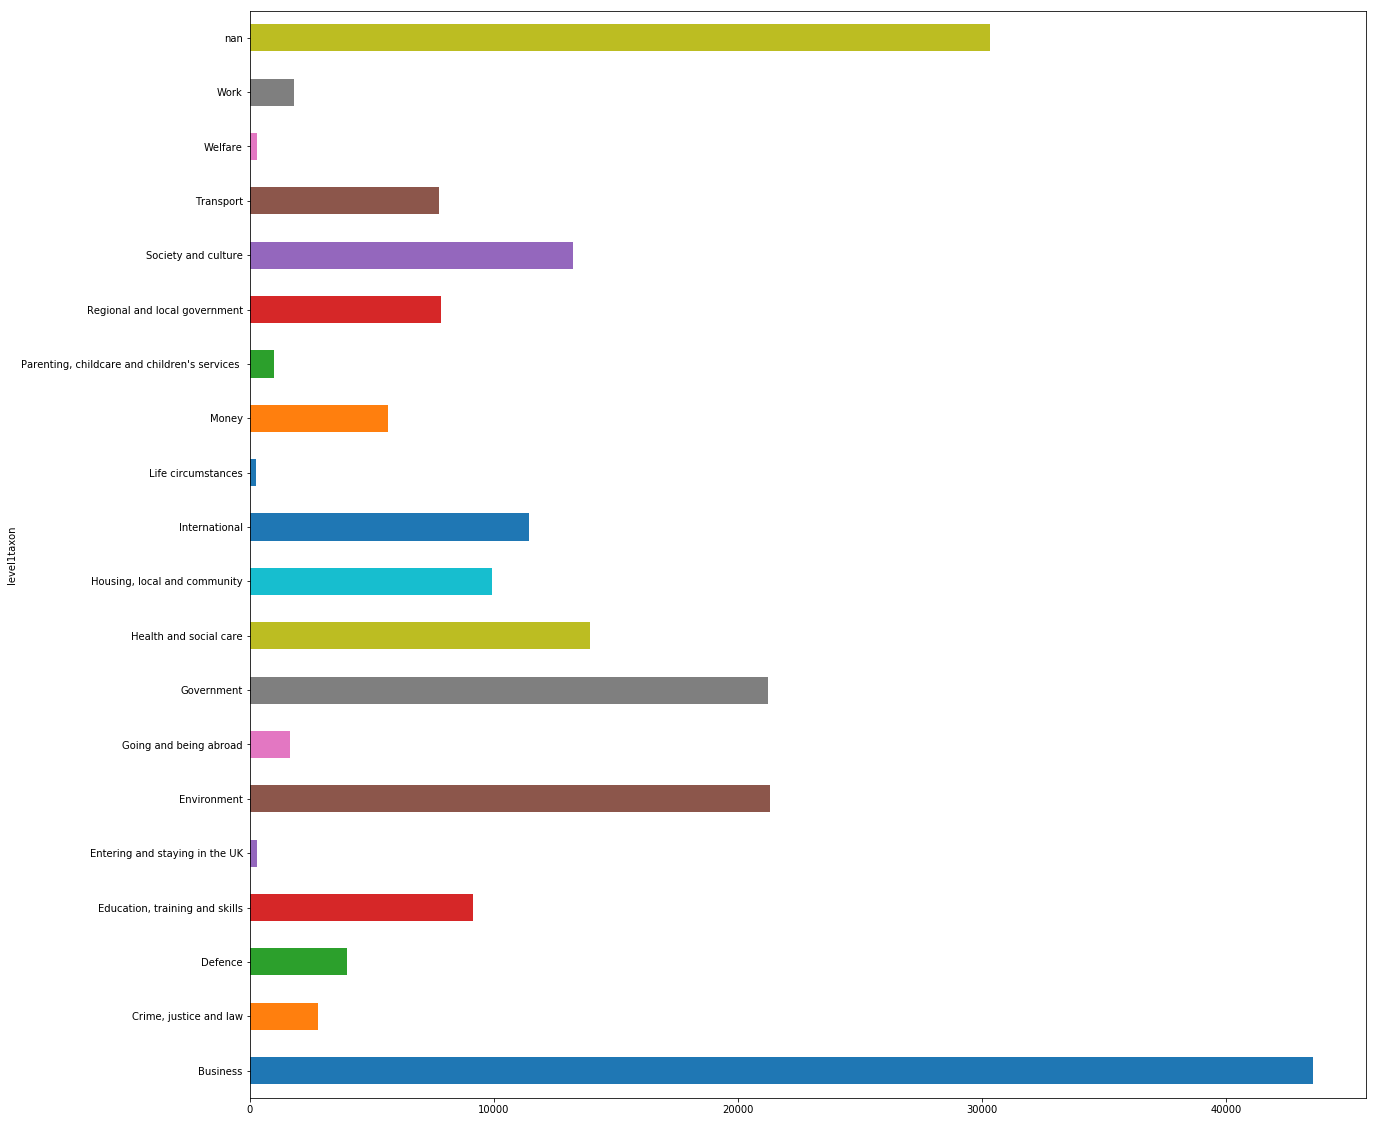

In [30]:
topfreq.plot(kind = 'barh', figsize=(20, 20))

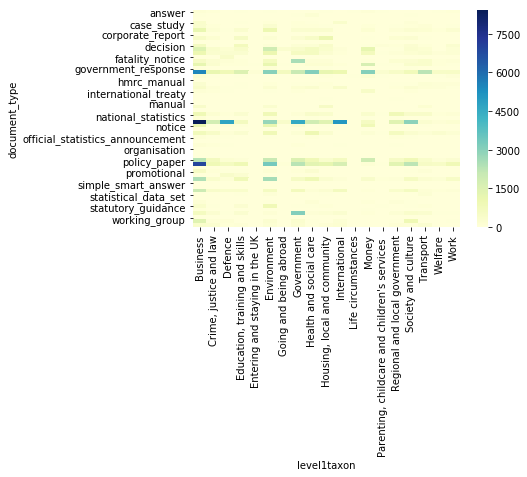

In [35]:
top_doctype = pd.crosstab(content_taxons_dedup['document_type'], content_taxons_dedup['level1taxon'])
sns.heatmap(top_doctype, cmap = "YlGnBu")

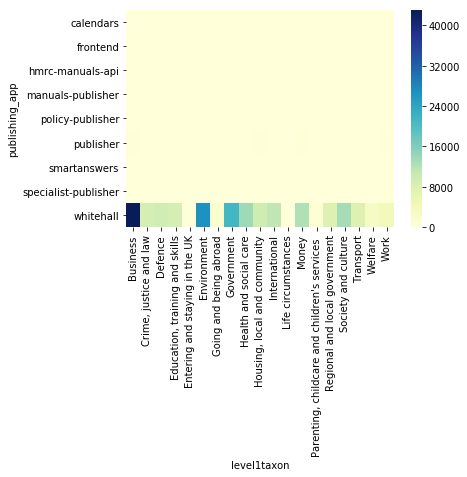

In [36]:
top_pubapp = pd.crosstab(content_taxons_dedup['publishing_app'], content_taxons_dedup['level1taxon'])
sns.heatmap(top_pubapp, cmap = "YlGnBu")

In [ ]:
pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

In [ ]:
content_taxons_dedup.groupby('level1taxon').size()

### Level 2 taxons

In [ ]:
print("There are {} unique taxon names in the level 2 taxon".format(content_taxons_dedup.level2taxon.nunique()))

In [38]:
second_freq = content_taxons_dedup.groupby('level2taxon').size()
second_freq

level2taxon
Adoption, fostering and surrogacy                                           67
Arts and culture                                                           736
Asylum                                                                      21
Aviation                                                                   246
Brexit and the EU                                                           10
British nationals overseas                                                 276
Business and enterprise                                                   3386
Business and the environment                                              1496
Business tax                                                              2314
Child Benefit                                                              112
Childcare and early years                                                  197
Children's health and welfare                                               47
Climate change and energy               

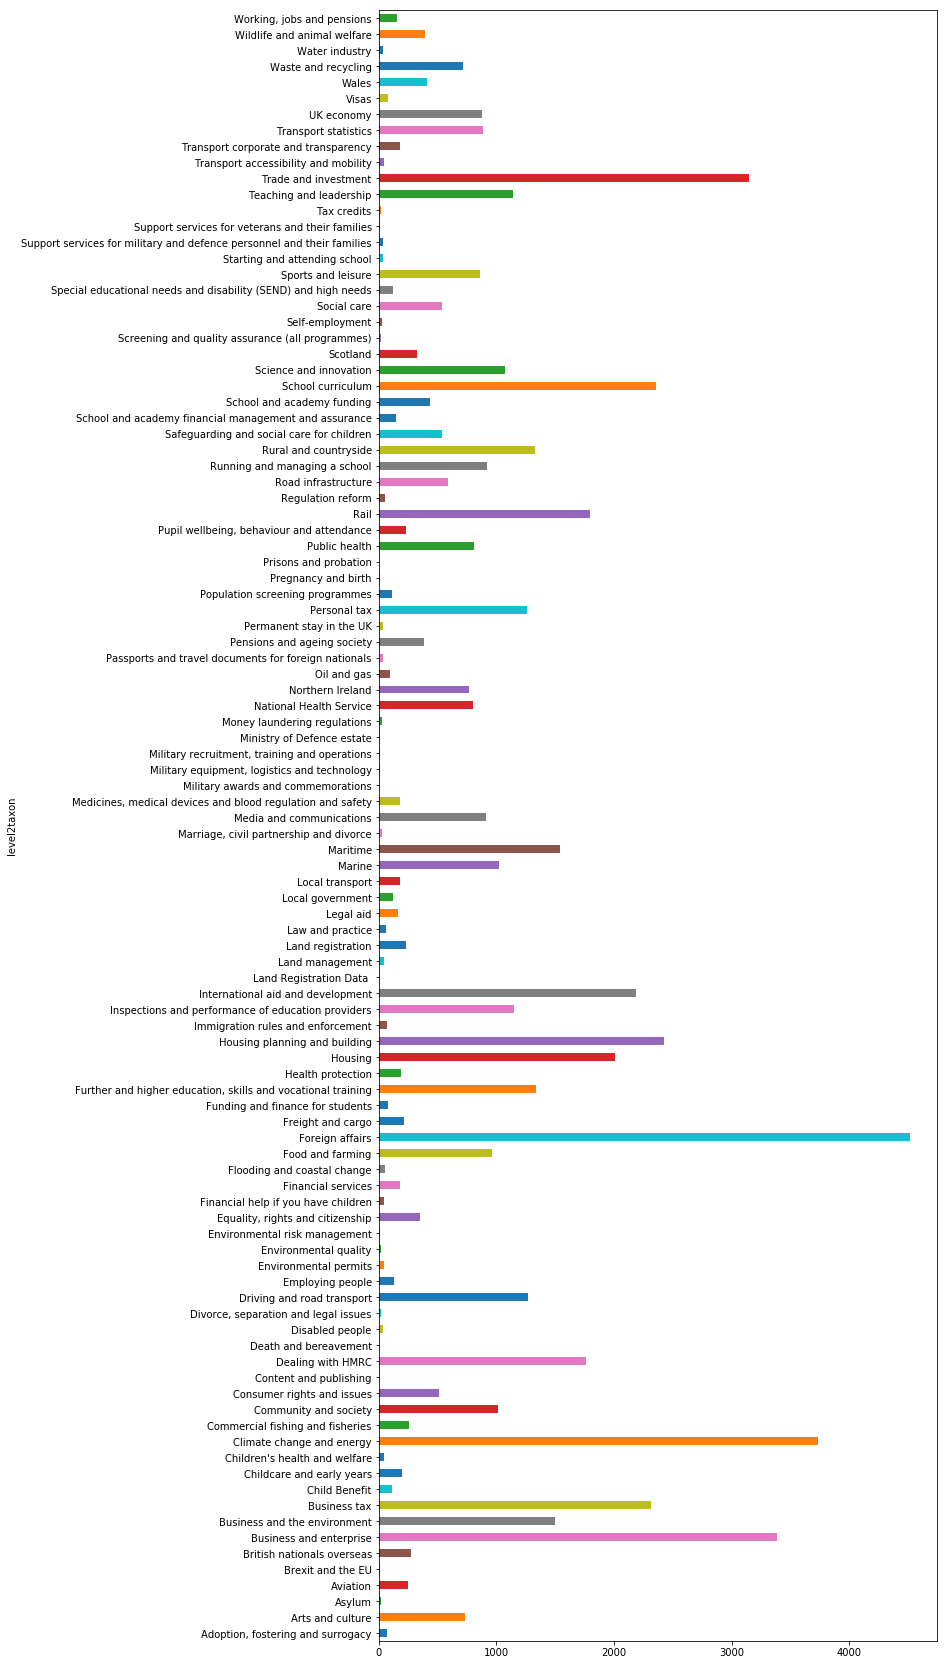

In [39]:
second_freq.plot(kind = 'barh', figsize=(10,30))

## How much stuff is only tagged to level 1?

Deal with Nans in level1taxon here but consider moving up this notebooks or moving to clean_taxons.py

In [4]:
sum(content_taxons_dedup['level1taxon'].isnull())

NameError: name 'content_taxons_dedup' is not defined

In [35]:
content_taxons_dedup.loc[content_taxons_dedup['level1taxon'].isnull(), 'level1taxon']

Series([], Name: level1taxon, dtype: object)

In [3]:
sum(content_taxons_dedup['level1taxon'] == 'nan')

NameError: name 'content_taxons_dedup' is not defined

In [36]:
content_taxons_dedup.loc[content_taxons_dedup['level1taxon'] == 'nan', 'level1taxon']

531       nan
532       nan
533       nan
534       nan
535       nan
536       nan
537       nan
538       nan
539       nan
540       nan
541       nan
542       nan
543       nan
544       nan
545       nan
546       nan
547       nan
548       nan
549       nan
550       nan
551       nan
552       nan
553       nan
554       nan
555       nan
556       nan
557       nan
558       nan
559       nan
560       nan
         ... 
141314    nan
141315    nan
141316    nan
141317    nan
141318    nan
141319    nan
141320    nan
141321    nan
141322    nan
141323    nan
141324    nan
141325    nan
141326    nan
141327    nan
141328    nan
141329    nan
141330    nan
141331    nan
141332    nan
141333    nan
141334    nan
141335    nan
141336    nan
141337    nan
141338    nan
141339    nan
141340    nan
141341    nan
141342    nan
141343    nan
Name: level1taxon, Length: 30316, dtype: object

In [32]:

content_taxons_dedup.loc[content_taxons_dedup['level1taxon'] == 'nan', 'level1taxon'] = content_taxons_dedup['taxon_name']



/Users/matthewupson/.pyenv/versions/3.4.6/lib/python3.4/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [33]:
# Does this work as expected? This is looking for a string nan, not an np.nan object.

def replace_nan(level1, taxon_name):
    """
    
    :param level1: <str>
    :param taxon_name: <str>
    """
    if level1 == 'nan':
        level1 = taxon_name
    return level1

In [34]:
# This does nothing, see above.

content_taxons_dedup['newcolumn'] = content_taxons_dedup.apply(lambda x: replace_nan(x['level1taxon'], x['taxon_name']), axis=1)


/Users/matthewupson/.pyenv/versions/3.4.6/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [ ]:
content_taxons_dedup.loc['level1taxon'] = np.where(content_taxons_dedup['level1taxon'] == 'nan', content_taxons_dedup['taxon_name'].values, content_taxons_dedup['level1taxon'].values)

In [ ]:
content_taxons_dedup.where(content_taxons_dedup['level1taxon'] == 'nan').shape

In [ ]:
, content_taxons_dedup['taxon_name'].values, content_taxons_dedup['level1taxon'].values)

In [ ]:
content_taxons_dedup['level1taxon']

## Checking that all items tagged to lower level have a label in toptaxon and secondtaxon

In [ ]:
level1_2 = pd.crosstab(content_taxons_dedup['level1taxon'], content_taxons_dedup['level2taxon'])

In [ ]:
sns.heatmap(level1_2, cmap = "YlGnBu", figsize=(20, 20))